## Para generar el modelo vamos a seguir los siguientes pasos:

* Importar librerías 🛫

* Carga de datos 📤  

* Entendimiento de datos  🤓

* Aumento de datos 🔍

  * Giro horizontal 💫

  * Rotación 🌀

  * Zoom 🔎

* Creación del modelo 📉

* Resumen del modelo 📜

* Entrenamiento del modelo 🤾‍♀️

### Importar librerías

El primer paso que seguiremos será importar las librerías que contienen las herramientas que nos ayudarán a construir nuestro modelo de clasificación. Estos son:
- [os](https://docs.python.org/3/library/os.html) — para leer archivos y directorios +
- [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html) — para usar funciones matemáticas y jugar con matrices
- [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) — para graficar y mostrar imágenes 
- [tensorflow](https://www.tensorflow.org/?hl=es-419) -- La principal biblioteca de código abierto para enseñarte a desarrollar y entrenar modelos de Aprendizaje automatico (AA) 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#pip install --ignore-installed --upgrade tensorflow 

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
#python3 -m pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.12.0-py3-none-any.whl 

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Carga de datos

Para construir nuestro clasificador de imágenes, empezamos por descargar el conjunto de datos.

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

https://storage.googleapis.com/openimages/web/index.html

Argumentos de la función tf.keras.utils.get_file
- fname: Name of the file. If an absolute path /path/to/file.txt is specified the file will be saved at that location.
- origin: Original URL of the file.
- extract: True tries extracting the file as an Archive, like tar or zip.

Esta función retorna el path o ruta del archivo descargado

El dataset que descargamos tiene la siguiente estructura en su directorio:

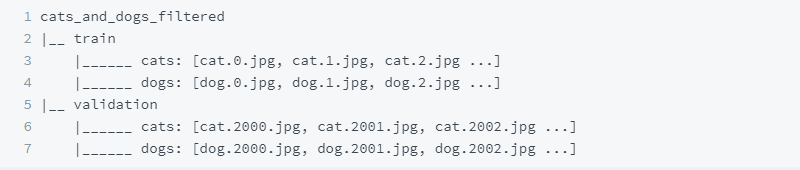

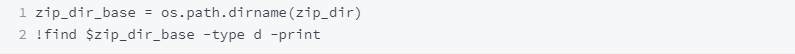

os.path.dirname(path): retorna el nombre del directorio del path indicado

Ahora asignaremos variables con la ruta apropiada para los sets de entrenamiento y validación

In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Entendimiento de datos

¿Cuántas imágenes de perros y gatos tenemos?

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

### Configurar parámetros 

Vamos a inicializar algunas variables con parámetros que utilizaremos posteriormente para el preprocesamiento de nuestro set de datos y el entrenamiento del modelo.

In [9]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

* batch_size - Enviamos las imágenes al proceso de aprendizaje en lotes. Este parámetro establece el tamaño de los lotes individuales.
* target_size - Cada imagen debe tener el mismo tamaño antes de enviarla al proceso de aprendizaje . 

Después de definir estas variables, en la fase de xxxx, utilizaremos el método **flow_from_directory**  para cargar las imágenes desde el disco y aplicar el reescalado y redimensionamiento.

## Data Augmentation

El sobreajuste u overfitting suele producirse cuando tenemos un número reducido de ejemplos de entrenamiento. Una forma de solucionar este problema es aumentar nuestro conjunto de datos para que tenga un número y una variedad suficientes de ejemplos de entrenamiento. El aumento de datos consiste en generar más datos de entrenamiento a partir de las muestras de entrenamiento existentes, aumentando las muestras mediante transformaciones aleatorias que producen imágenes de aspecto creíble.

En **tf.keras** podemos implementar esto usando la misma clase **ImageDataGenerator**. Simplemente podemos pasar las diferentes transformaciones que queramos a nuestro conjunto de datos como forma de argumentos y éste se encargará de aplicarlo al conjunto de datos durante nuestro proceso de entrenamiento.

Para empezar, vamos a definir una función que pueda mostrar una imagen, para que podamos ver el tipo de aumento que se ha realizado. 

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Rotar la imagen

Esta acción girará aleatoriamente la imagen hasta un número determinado de grados. Aquí, lo estableceremos en 45.

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


### Girar la imagen horizontalmente

Podemos empezar aplicando aleatoriamente el aumento del giro horizontal a nuestro conjunto de datos y ver cómo quedarán las imágenes individuales después de la transformación. Esto se consigue pasando **horizontal_flip=True** como argumento a la clase **ImageDataGenerator**.

Para ver la transformación en acción, tomemos una imagen de muestra de nuestro conjunto de entrenamiento y repitámosla cinco veces. El aumento se aplicará aleatoriamente (o no) a cada repetición.

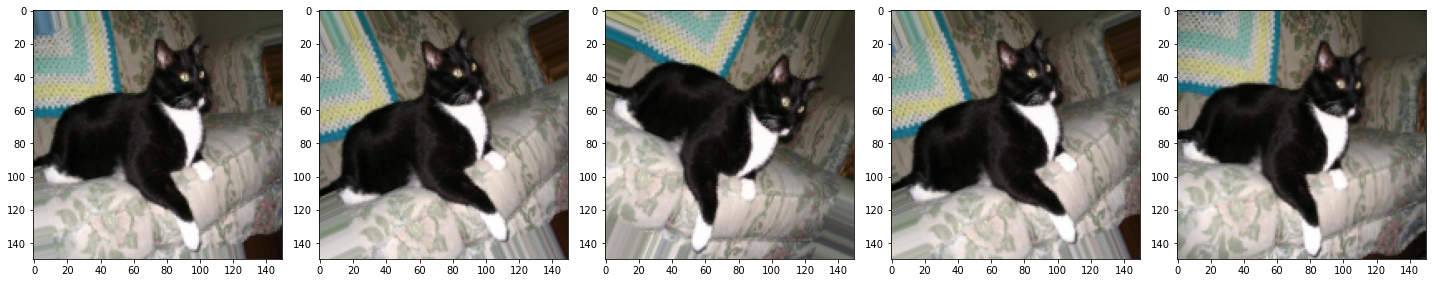

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Para ver la transformación en acción, tomemos de nuevo una imagen de muestra de nuestro conjunto de entrenamiento y repitámosla. El aumento se aplicará aleatoriamente (o no) a cada repetición.

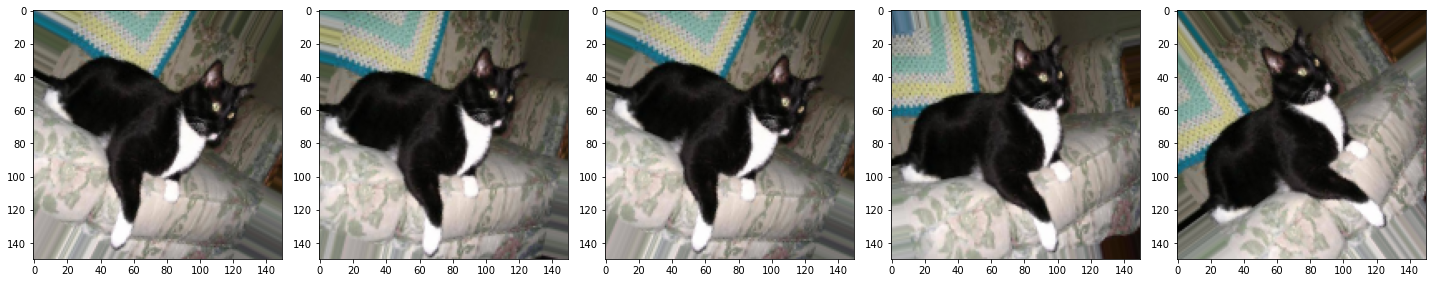

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Aplicar Zoom

También podemos aplicar el aumento de zoom a nuestro conjunto de datos, ampliando las imágenes hasta un 50% de forma aleatoria.

Una vez más, tome una imagen de muestra de nuestro conjunto de entrenamiento y repítala. El aumento se aplicará aleatoriamente (o no) a cada repetición.

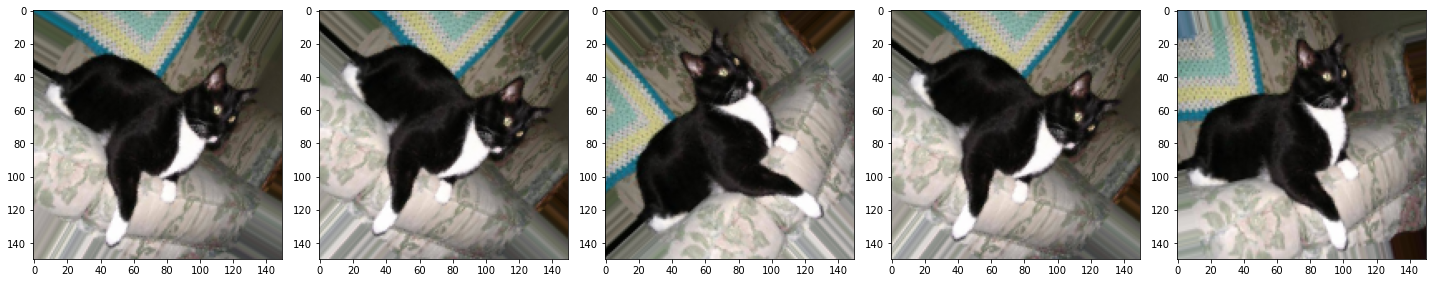

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Integrémoslo todo!

Podemos aplicar todos estos aumentos, e incluso otros, con una sola línea de código, pasando los aumentos como argumentos con los valores adecuados.
En este caso, hemos aplicado el reescalado, la rotación de 45 grados, el desplazamiento de la anchura, el desplazamiento de la altura, el volteo horizontal y el aumento del zoom a nuestras imágenes de entrenamiento.

In [15]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Visualicemos cómo se vería una sola imagen cinco veces diferentes, cuando pasamos estos aumentos al azar a nuestro conjunto de datos.

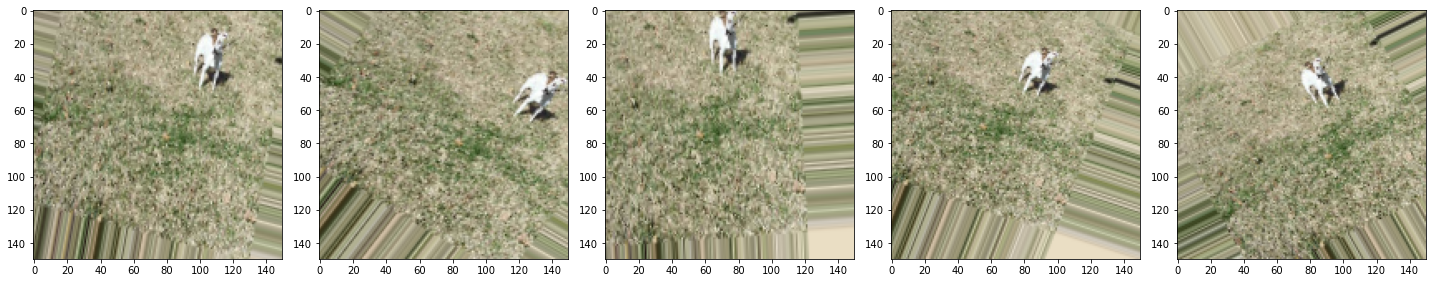

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Generador de datos de validación

Generalmente, sólo aplicamos el aumento de datos a nuestros ejemplos de entrenamiento, ya que las imágenes originales deben ser representativas de lo que nuestro modelo necesita manejar. Por lo tanto, en este caso sólo estamos reescalando nuestras imágenes de validación y convirtiéndolas en lotes utilizando **ImageDataGenerator**.

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.
